In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
dataset=pd.read_csv(r"C:\Users\HP\Downloads\3.0-Model+Training\Algerian_forest_fires_dataset_UPDATE.csv",header=1)

In [3]:
dataset.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire
4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire


In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246 entries, 0 to 245
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   day          246 non-null    object
 1   month        245 non-null    object
 2   year         245 non-null    object
 3   Temperature  245 non-null    object
 4    RH          245 non-null    object
 5    Ws          245 non-null    object
 6   Rain         245 non-null    object
 7   FFMC         245 non-null    object
 8   DMC          245 non-null    object
 9   DC           245 non-null    object
 10  ISI          245 non-null    object
 11  BUI          245 non-null    object
 12  FWI          245 non-null    object
 13  Classes      244 non-null    object
dtypes: object(14)
memory usage: 27.0+ KB


In [5]:
dataset.isnull().sum()


day            0
month          1
year           1
Temperature    1
 RH            1
 Ws            1
Rain           1
FFMC           1
DMC            1
DC             1
ISI            1
BUI            1
FWI            1
Classes        2
dtype: int64

In [6]:
df=dataset.copy()


In [7]:
df

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire
4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
241,26,09,2012,30,65,14,0,85.4,16,44.5,4.5,16.9,6.5,fire
242,27,09,2012,28,87,15,4.4,41.1,6.5,8,0.1,6.2,0,not fire
243,28,09,2012,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,not fire
244,29,09,2012,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,not fire


In [8]:
df[df.isnull().any(axis=1)]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
122,Sidi-Bel Abbes Region Dataset,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
167,14,07,2012,37,37,18,0.2,88.9,12.9,14.6 9,12.5,10.4,fire,NaN


In [9]:
df['Region']=0
df.head()
df.loc[123:,"Region"]=1

In [10]:
df['Region'].value_counts()

Region
0    123
1    123
Name: count, dtype: int64

In [11]:
print(df[df['DMC']=='Nan'].index)

Index([], dtype='int64')


In [12]:
df=df.drop(122).reset_index(drop=True)

In [13]:
df.iloc[[122]]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
122,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,1


In [14]:
df=df.drop(122).reset_index(drop=True)

In [15]:
df.iloc[[123]]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
123,02,06,2012,30,73,13,4,55.7,2.7,7.8,0.6,2.9,0.2,not fire,1


In [16]:
df.info()
print(df.columns)



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   day          244 non-null    object
 1   month        244 non-null    object
 2   year         244 non-null    object
 3   Temperature  244 non-null    object
 4    RH          244 non-null    object
 5    Ws          244 non-null    object
 6   Rain         244 non-null    object
 7   FFMC         244 non-null    object
 8   DMC          244 non-null    object
 9   DC           244 non-null    object
 10  ISI          244 non-null    object
 11  BUI          244 non-null    object
 12  FWI          244 non-null    object
 13  Classes      243 non-null    object
 14  Region       244 non-null    int64 
dtypes: int64(1), object(14)
memory usage: 28.7+ KB
Index(['day', 'month', 'year', 'Temperature', ' RH', ' Ws', 'Rain ', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes  ', 'Region'],
    

In [17]:
df['Classes']=df['Classes  ']

In [18]:
df.columns

Index(['day', 'month', 'year', 'Temperature', ' RH', ' Ws', 'Rain ', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes  ', 'Region', 'Classes'],
      dtype='object')

In [19]:
df=df.drop('Classes  ',axis=1)


In [20]:
df.columns




Index(['day', 'month', 'year', 'Temperature', ' RH', ' Ws', 'Rain ', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Region', 'Classes'],
      dtype='object')

In [21]:
df['Classes'].unique()

array(['not fire   ', 'fire   ', 'fire', 'fire ', 'not fire', 'not fire ',
       'not fire     ', nan, 'not fire    '], dtype=object)

In [22]:
df['Classes']=np.where(df['Classes'].str.contains('not fire'), 0, 1)

In [23]:
df['Classes'].value_counts()
df['Classes']=df["Classes"].astype(int)

In [24]:
df.isnull().sum()


day            0
month          0
year           0
Temperature    0
 RH            0
 Ws            0
Rain           0
FFMC           0
DMC            0
DC             0
ISI            0
BUI            0
FWI            0
Region         0
Classes        0
dtype: int64

In [25]:
for i in df.columns:
    print(i)
    print(df[i].unique())

day
['01' '02' '03' '04' '05' '06' '07' '08' '09' '10' '11' '12' '13' '14'
 '15' '16' '17' '18' '19' '20' '21' '22' '23' '24' '25' '26' '27' '28'
 '29' '30' '31']
month
['06' '07' '08' '09']
year
['2012']
Temperature
['29' '26' '25' '27' '31' '33' '30' '28' '32' '34' '35' '36' '37' '22'
 '24' '38' '39' '40' '42']
 RH
['57' '61' '82' '89' '77' '67' '54' '73' '88' '79' '65' '81' '84' '78'
 '80' '55' '62' '66' '64' '53' '47' '50' '68' '75' '76' '63' '69' '70'
 '59' '48' '45' '60' '51' '52' '58' '86' '74' '71' '49' '44' '41' '42'
 '90' '87' '72' '46' '37' '36' '56' '43' '83' '29' '34' '33' '35' '39'
 '31' '21' '40' '24' '38' '26']
 Ws
['18' '13' '22' '16' '14' '15' '12' '19' '21' '20' '17' '26' '11' '10' '9'
 '8' '6' '29']
Rain 
['0' '1.3' '13.1' '2.5' '0.2' '1.2' '0.5' '3.1' '0.7' '0.6' '0.3' '0.1'
 '0.4' '1' '1.4' '0.8' '16.8' '7.2' '10.1' '3.8' '0.9' '1.8' '4.6' '8.3'
 '5.8' '4' '2' '4.7' '8.7' '4.5' '1.1' '1.7' '2.2' '6' '1.9' '2.9' '4.1'
 '6.5' '4.4']
FFMC
['65.7' '64.4' '47.1' '28.6'

In [26]:
for i in df.columns[0:6]:
    df[i]=df[i].astype(int)

In [27]:
df[df['FWI']=='fire   ']

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Region,Classes
165,14,7,2012,37,37,18,0.2,88.9,12.9,14.6 9,12.5,10.4,fire,1,0


In [28]:
df=df.drop(165).reset_index(drop=True)

In [29]:
for i in df.columns:
    print(i)
    print(df[i].unique())

day
[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31]
month
[6 7 8 9]
year
[2012]
Temperature
[29 26 25 27 31 33 30 28 32 34 35 36 37 22 24 38 39 40 42]
 RH
[57 61 82 89 77 67 54 73 88 79 65 81 84 78 80 55 62 66 64 53 47 50 68 75
 76 63 69 70 59 48 45 60 51 52 58 86 74 71 49 44 41 42 90 87 72 46 37 36
 56 43 83 29 34 33 35 39 31 21 40 24 38 26]
 Ws
[18 13 22 16 14 15 12 19 21 20 17 26 11 10  9  8  6 29]
Rain 
['0' '1.3' '13.1' '2.5' '0.2' '1.2' '0.5' '3.1' '0.7' '0.6' '0.3' '0.1'
 '0.4' '1' '1.4' '0.8' '16.8' '7.2' '10.1' '3.8' '0.9' '1.8' '4.6' '8.3'
 '5.8' '4' '2' '4.7' '8.7' '4.5' '1.1' '1.7' '2.2' '6' '1.9' '2.9' '4.1'
 '6.5' '4.4']
FFMC
['65.7' '64.4' '47.1' '28.6' '64.8' '82.6' '88.2' '86.6' '52.9' '73.2'
 '84.5' '84' '50' '59' '49.4' '36.1' '37.3' '56.9' '79.9' '59.8' '81'
 '79.1' '81.4' '85.9' '86.7' '86.8' '89' '89.1' '88.7' '59.9' '55.7'
 '63.1' '80.1' '87' '80' '85.6' '66.6' '81.1' '75.1' '81.8' '73.9' '60.7'
 '72.6' '82.8' '85.4

In [30]:
for i in df.columns[7:13]:
     print(i)
     df[i]=df[i].astype('float')

FFMC
DMC
DC
ISI
BUI
FWI


In [31]:
FFMC
DMC
DC

NameError: name 'FFMC' is not defined

In [31]:
df['FFMC'].unique()


array([65.7, 64.4, 47.1, 28.6, 64.8, 82.6, 88.2, 86.6, 52.9, 73.2, 84.5,
       84. , 50. , 59. , 49.4, 36.1, 37.3, 56.9, 79.9, 59.8, 81. , 79.1,
       81.4, 85.9, 86.7, 86.8, 89. , 89.1, 88.7, 59.9, 55.7, 63.1, 80.1,
       87. , 80. , 85.6, 66.6, 81.1, 75.1, 81.8, 73.9, 60.7, 72.6, 82.8,
       85.4, 88.1, 73.4, 68.2, 70. , 84.3, 89.2, 90.3, 86.5, 87.2, 78.8,
       78. , 76.6, 85. , 86.4, 77.1, 87.4, 88.9, 81.3, 82.4, 80.2, 89.3,
       89.4, 88.3, 88.6, 89.5, 85.8, 84.9, 90.1, 72.7, 52.5, 46. , 30.5,
       42.6, 68.4, 80.8, 75.8, 69.6, 62. , 56.1, 58.5, 71. , 40.9, 47.4,
       44.9, 78.1, 87.7, 83.8, 87.8, 77.8, 73.7, 68.3, 48.6, 82. , 85.7,
       77.5, 45. , 57.1, 48.7, 79.4, 83.7, 71.4, 90.6, 72.3, 53.4, 66.8,
       62.2, 65.5, 64.6, 60.2, 86.2, 78.3, 74.2, 85.3, 86. , 92.5, 79.7,
       63.7, 87.6, 84.7, 88. , 90.5, 82.3, 74.8, 85.2, 84.6, 86.1, 89.9,
       93.9, 91.5, 87.3, 72.8, 73.8, 87.5, 93.3, 93.7, 93.8, 70.5, 69.7,
       91.7, 94.2, 93. , 91.9, 83.9, 92. , 96. , 94

In [32]:
type(df['FFMC'])


pandas.core.series.Series

In [33]:
df.columns[6:12]

Index(['Rain ', 'FFMC', 'DMC', 'DC', 'ISI', 'BUI'], dtype='object')

In [34]:
df.columns[9]

'DC'

In [35]:
df['DC'].unique()
df["DC"]=df['DC'].astype(str)
df['DC']=df['DC'].str.strip()
df['DC'] = df['DC'].astype(str).str.strip().str.split().str[0].astype(float)


In [36]:
##fix spaces in coloumn name
dataset.columns=dataset.columns.str.strip()
dataset.columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes'],
      dtype='object')

In [37]:
for i in df.columns[6:12]:
    df[i]=df[i].astype('float')

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          243 non-null    int32  
 1   month        243 non-null    int32  
 2   year         243 non-null    int32  
 3   Temperature  243 non-null    int32  
 4    RH          243 non-null    int32  
 5    Ws          243 non-null    int32  
 6   Rain         243 non-null    float64
 7   FFMC         243 non-null    float64
 8   DMC          243 non-null    float64
 9   DC           243 non-null    float64
 10  ISI          243 non-null    float64
 11  BUI          243 non-null    float64
 12  FWI          243 non-null    float64
 13  Region       243 non-null    int64  
 14  Classes      243 non-null    int32  
dtypes: float64(7), int32(7), int64(1)
memory usage: 22.0 KB


In [39]:
df[' Ws']=df[' Ws'].astype(int)



In [40]:
df

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Region,Classes
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0,0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0,0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0,0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0,0
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
238,26,9,2012,30,65,14,0.0,85.4,16.0,44.5,4.5,16.9,6.5,1,1
239,27,9,2012,28,87,15,4.4,41.1,6.5,8.0,0.1,6.2,0.0,1,0
240,28,9,2012,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,1,0
241,29,9,2012,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,1,0


In [41]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          243 non-null    int32  
 1   month        243 non-null    int32  
 2   year         243 non-null    int32  
 3   Temperature  243 non-null    int32  
 4    RH          243 non-null    int32  
 5    Ws          243 non-null    int32  
 6   Rain         243 non-null    float64
 7   FFMC         243 non-null    float64
 8   DMC          243 non-null    float64
 9   DC           243 non-null    float64
 10  ISI          243 non-null    float64
 11  BUI          243 non-null    float64
 12  FWI          243 non-null    float64
 13  Region       243 non-null    int64  
 14  Classes      243 non-null    int32  
dtypes: float64(7), int32(7), int64(1)
memory usage: 22.0 KB


In [42]:
df['FWI']=df["FWI"].astype(float)

In [43]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Region,Classes
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0,0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0,0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0,0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0,0
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0,0


In [44]:
df.columns=df.columns.str.strip()


In [45]:

for i in df.columns[0:3]:

     df=df.drop(i,axis=1)

In [46]:
df.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Region,Classes
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0,0


In [47]:
df.to_csv(r"C:\Users\HP\Downloads\3.0-Model+Training\Algerian_forest_fires_dataset_cleaned_byme_only.csv")

In [48]:
df['Classes'].value_counts()

Classes
1    137
0    106
Name: count, dtype: int64

In [49]:
df.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Region,Classes
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0,0


Train test split

In [50]:
X=df.drop('FWI',axis=1)
y=df['FWI']

In [51]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [52]:
type(X_train),type(X_test)

(pandas.core.frame.DataFrame, pandas.core.frame.DataFrame)

In [53]:
type(y)

pandas.core.series.Series

In [54]:
X_train.shape

(194, 11)

In [55]:
df.corr()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Region,Classes
Temperature,1.000000,-0.651400,-0.284510,-0.326492,0.676568,0.485687,0.376284,0.603871,0.459789,0.566670,0.269555,0.516015
RH,-0.651400,1.000000,0.244048,0.222356,-0.644873,-0.408519,-0.226941,-0.686667,-0.353841,-0.580957,-0.402682,-0.432161
Ws,-0.284510,0.244048,1.000000,0.171506,-0.166548,-0.000721,0.079135,0.008532,0.031438,0.032368,-0.181160,-0.069964
Rain,-0.326492,0.222356,0.171506,1.000000,-0.543906,-0.288773,-0.298023,-0.347484,-0.299852,-0.324422,-0.040013,-0.379097
FFMC,0.676568,-0.644873,-0.166548,-0.543906,1.000000,0.603608,0.507397,0.740007,0.592011,0.691132,0.222241,0.769492
DMC,0.485687,-0.408519,-0.000721,-0.288773,0.603608,1.000000,0.875925,0.680454,0.982248,0.875864,0.192089,0.585658
DC,0.376284,-0.226941,0.079135,-0.298023,0.507397,0.875925,1.000000,0.508643,0.941988,0.739521,-0.078734,0.511123
ISI,0.603871,-0.686667,0.008532,-0.347484,0.740007,0.680454,0.508643,1.000000,0.644093,0.922895,0.263197,0.735197
BUI,0.459789,-0.353841,0.031438,-0.299852,0.592011,0.982248,0.941988,0.644093,1.000000,0.857973,0.089408,0.586639
FWI,0.566670,-0.580957,0.032368,-0.324422,0.691132,0.875864,0.739521,0.922895,0.857973,1.000000,0.197102,0.719216


<Axes: >

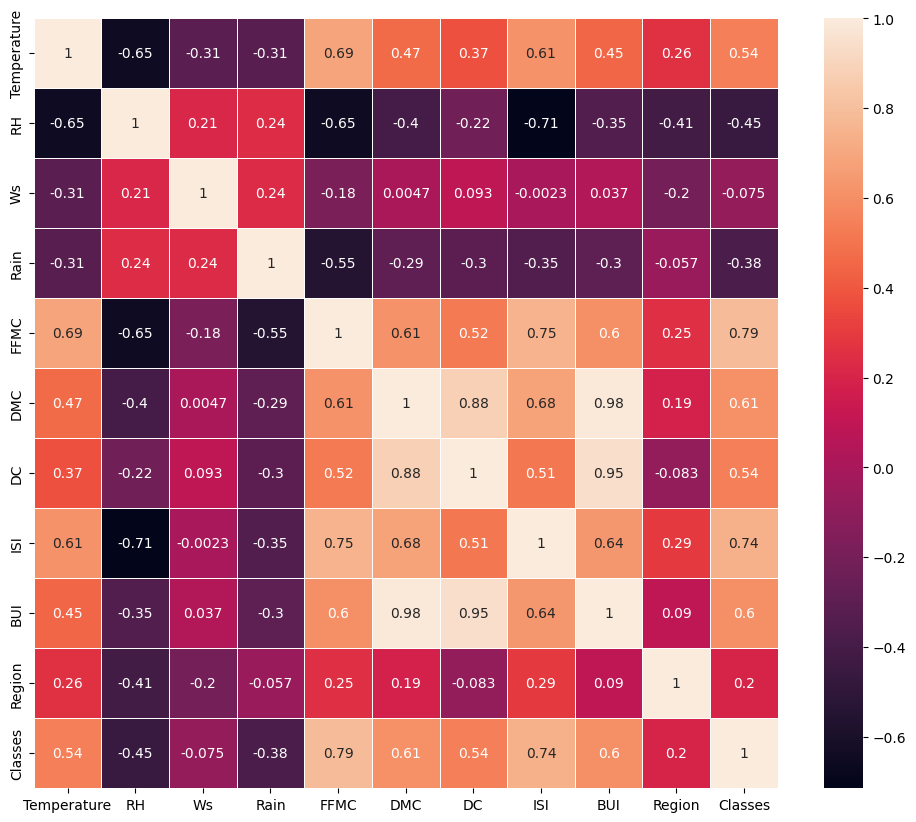

In [56]:
import seaborn as sns
plt.figure(figsize=(12,10))
sns.heatmap(data=X_train.corr(),linewidths=0.5,annot=True)


In [57]:
data=X_train.corr()

In [58]:
corr_matrix=data
len(corr_matrix.columns)

11

In [59]:
X_train.info()


<class 'pandas.core.frame.DataFrame'>
Index: 194 entries, 115 to 102
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Temperature  194 non-null    int32  
 1   RH           194 non-null    int32  
 2   Ws           194 non-null    int32  
 3   Rain         194 non-null    float64
 4   FFMC         194 non-null    float64
 5   DMC          194 non-null    float64
 6   DC           194 non-null    float64
 7   ISI          194 non-null    float64
 8   BUI          194 non-null    float64
 9   Region       194 non-null    int64  
 10  Classes      194 non-null    int32  
dtypes: float64(6), int32(4), int64(1)
memory usage: 15.2 KB


In [ ]:
'''def correlation(data,threshold):
    corr_matrix=data.corr()
    unwanted=set()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if (corr_matrix.iloc[i,j]>threshold):
                name=corr_matrix.columns[i]
                unwanted.add(name)
    return unwanted'''

In [ ]:
'''coulumn_name=correlation(X_train,0.85)
print(coulumn_name)
df.drop(coulumn_name,axis=1,inplace=True)''''''

SyntaxError: incomplete input (3176104988.py, line 3)

In [60]:
df

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Region,Classes
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
238,30,65,14,0.0,85.4,16.0,44.5,4.5,16.9,6.5,1,1
239,28,87,15,4.4,41.1,6.5,8.0,0.1,6.2,0.0,1,0
240,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,1,0
241,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,1,0


In [61]:
X_train.columns

Index(['Temperature', 'RH', 'Ws', 'Rain', 'FFMC', 'DMC', 'DC', 'ISI', 'BUI',
       'Region', 'Classes'],
      dtype='object')

In [62]:
def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold:  # we are interested in absolute correlation
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

In [63]:
corr_features=correlation(X_train,0.80)
corr_features
X_train.drop(corr_features,axis=1,inplace=True)
X_test.drop(corr_features,axis=1,inplace=True)

In [64]:
X_train.shape,X_test.shape

((194, 9), (49, 9))

In [65]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train_scaler=scaler.fit_transform(X_train)
X_test_scaler=scaler.transform(X_test)
X_train_scaler

array([[-0.87563202,  0.21321832,  1.28577038, ..., -0.79648833,
        -1.01036297, -1.14434427],
       [ 0.22209084, -1.65484925,  0.14504117, ...,  1.88757476,
         0.98974332,  0.8738629 ],
       [ 1.5942444 , -1.25454906, -0.99568804, ..., -0.19488798,
         0.98974332,  0.8738629 ],
       ...,
       [-1.97335488,  0.947102  ,  0.52528424, ..., -1.0972885 ,
        -1.01036297, -1.14434427],
       [ 0.49652155, -0.18708188,  0.14504117, ...,  0.56868169,
         0.98974332,  0.8738629 ],
       [-0.60120131,  1.0138187 ,  2.04625653, ..., -0.88904223,
        -1.01036297, -1.14434427]])

Text(0.5, 1.0, 'boxplot after standarization')

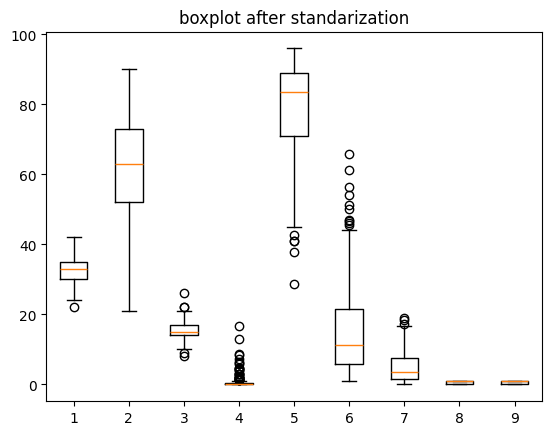

In [66]:
plt.boxplot(X_train)
plt.title("boxplot after standarization")

Text(0.5, 1.0, 'boxplot after standarization')

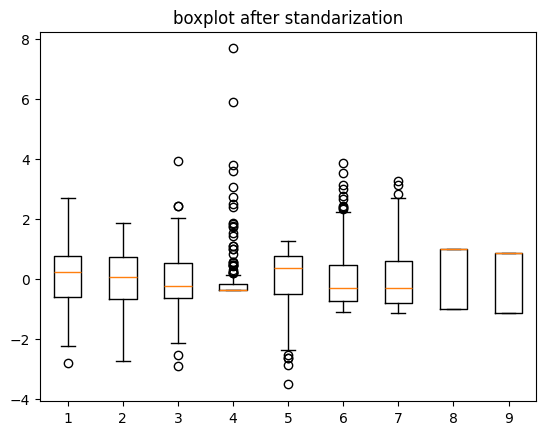

In [67]:
plt.boxplot(X_train_scaler)
plt.title("boxplot after standarization")

Mean Squared Error: 0.5882990110708669
Mean Absolute Error: 0.5049978694165669
R2 Score: 0.9805895859259883


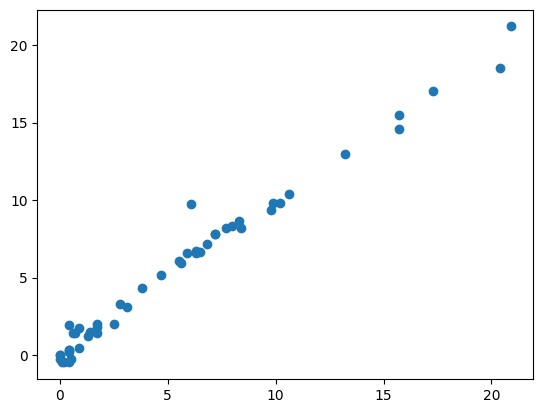

In [68]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error 
from sklearn.metrics import mean_absolute_error 
from sklearn.metrics import r2_score
linreg=LinearRegression()
linreg.fit(X_train_scaler,y_train)
y_pred=linreg.predict(X_test_scaler)
mae=mean_squared_error(y_test,y_pred)
mse=mean_absolute_error(y_test,y_pred)
score=r2_score(y_test,y_pred)
print("Mean Squared Error:",mae)    
print("Mean Absolute Error:",mse)
print("R2 Score:",score)
plt.scatter(y_test,y_pred)


Mean Squared Error: 1.726042325023142
Mean Absolute Error: 1.0093958923873407
R2 Score: 0.9430507350726562


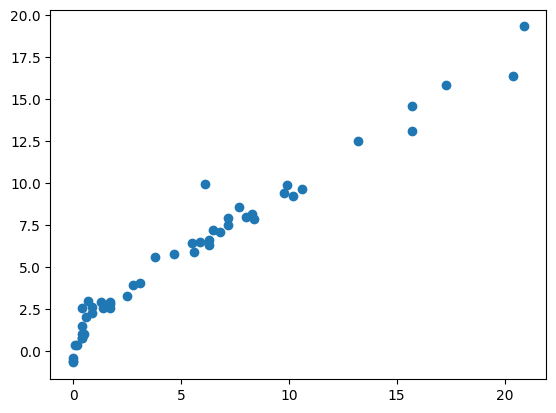

In [69]:
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error 
from sklearn.metrics import mean_absolute_error 
from sklearn.metrics import r2_score
lasso=Lasso()
lasso.fit(X_train_scaler,y_train)
y_pred=lasso.predict(X_test_scaler)
mae=mean_squared_error(y_test,y_pred)
mse=mean_absolute_error(y_test,y_pred)
score=r2_score(y_test,y_pred)
print("Mean Squared Error:",mae)    
print("Mean Absolute Error:",mse)
print("R2 Score:",score)
plt.scatter(y_test,y_pred)


In [70]:
from sklearn.linear_model import LassoCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Initialize LassoCV (with default 5-fold cross-validation)
lasso = LassoCV(cv=5)
lasso.fit(X_train_scaler, y_train)

# Predict on test data
y_pred = lasso.predict(X_test_scaler)

# Evaluation metrics
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print results
print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)
print("R2 Score:", r2)
print("Best alpha (regularization strength):", lasso.alpha_)



Mean Squared Error: 0.656876860567123
Mean Absolute Error: 0.5557129837915948
R2 Score: 0.978326919441806
Best alpha (regularization strength): 0.04391080246587261


Mean Squared Error: 0.602961607054855
Mean Absolute Error: 0.5192048325844728
R2 Score: 0.9801058063273602


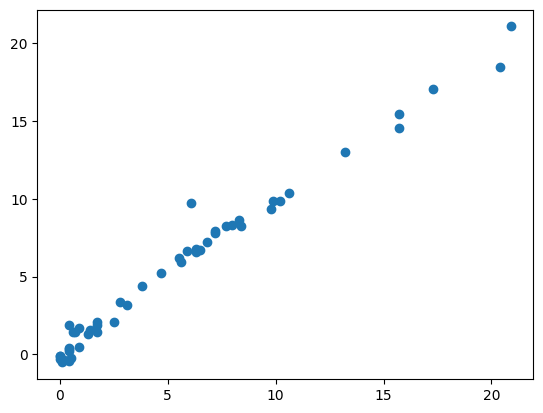

In [71]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error 
from sklearn.metrics import mean_absolute_error 
from sklearn.metrics import r2_score
ridge=Ridge()
ridge.fit(X_train_scaler,y_train)
y_pred=ridge.predict(X_test_scaler)
mae=mean_squared_error(y_test,y_pred)
mse=mean_absolute_error(y_test,y_pred)
score=r2_score(y_test,y_pred)
print("Mean Squared Error:",mae)    
print("Mean Absolute Error:",mse)
print("R2 Score:",score)



plt.scatter(y_test,y_pred)

##Pickle the machine learning models,preprocesing modal standard scaler

In [72]:
scaler


StandardScaler()

In [76]:
ridge

Ridge()

In [78]:
import pickle

# Assume you already have `scaler` and `ridge_model` trained
pickle.dump(scaler, open('scaler.pkl', 'wb'))         # Save the scaler
pickle.dump(ridge, open('ridge.pkl', 'wb'))     # Save the actual Ridge model
